# Selecting SVM hyperparameters with grid search

In the attached workspace, you will use a grid search to select the hyperparameters for an SVM classifier.

You'll need to specify this random state in your notebook:

> random_state = 28

| Name	| Type	| Description |
| --- | --- | --- |
|`Xtr`|	2d numpy array|Training data (features).|
|`Xts`|	2d numpy array|Test data (features).|
|`ytr`|	1d numpy array|Training data (target).|
|`yts`|	1d numpy array|Test data (target).|
|`Xtr_std`	|2d numpy array	|Training data (features) after standardizing.|
|`Xts_std`	|2d numpy array	|Test data (features) after standardizing.|
|`gamma_best`|	float	|The value of the tuning parameter gamma that yields the best accuracy on the validation data.|
|`C_best`	|float|	The value of the tuning parameter C that yields the best accuracy on the validation data.|
|`acc_ts`	|float	|The accuracy of the refitted model (with best parameters) on the test set.|



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

First, upload the `data-svm.csv` file to the workspace. Then, load in data from that file:

In [2]:
dat = np.genfromtxt('data-svm.csv',delimiter=',')
X = dat[:,:-1]
y = dat[:,-1]

Now, we will split the data into training and test sets using `sklearn`'s implementation of `train_test_split`. We will:

* Reserve 25% of the data for testing, and leave 75% for training.
* Shuffle the data, and use the random state specified in the PrairieLearn question page.

In [3]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
random_state = 28
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.25, random_state=random_state)

Use the `StandardScaler` to standardize the data by removing the mean and scaling to unit variance (using the statistics of the training set only).

In [4]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
scaler = StandardScaler()
Xtr_std = scaler.fit_transform(Xtr)
Xts_std = scaler.transform(Xts)

We are going to use `GridSearchCV` to test the following "parameter grid" of SVM hyperparamters:

In [5]:
param_grid = [
  {'C': [1e-1, 1e1, 1e3, 1e5, 1e7], 'gamma': [1e2, 1, 1e-1, 1e-3], 'kernel': ['rbf']},
 ]

In the following cell, create a `GridSearchCV` and fit it using the standardized training data.  

Use 3-fold CV in your grid search, and pass an `SVC` model and the parameter grid specified above. Leave other settings at their default values.

In [6]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
clf = GridSearchCV(SVC(), param_grid, cv=3)
clf.fit(Xtr_std, ytr)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.1, 10.0, 1000.0, 100000.0, 10000000.0],
                          'gamma': [100.0, 1, 0.1, 0.001], 'kernel': ['rbf']}])

If your fitted model is in the variable `clf`, you can use the following cell to visualize the results:

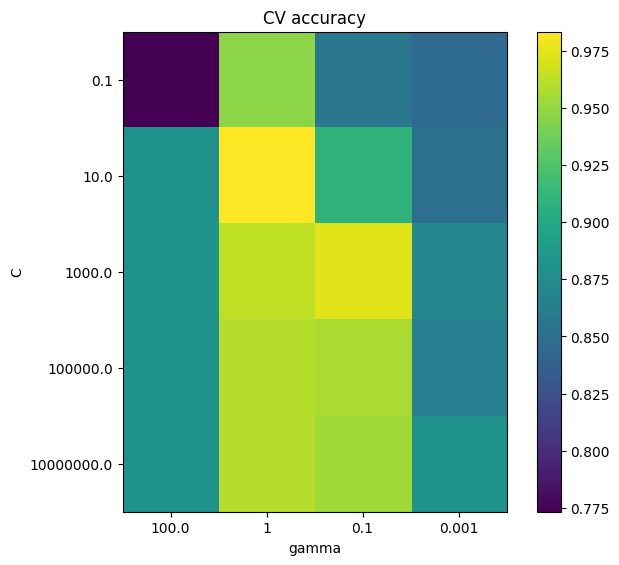

In [7]:
scores = clf.cv_results_['mean_test_score'].reshape(len(param_grid[0]['C']),len(param_grid[0]['gamma']))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.viridis)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid[0]['gamma'])), param_grid[0]['gamma'])
plt.yticks(np.arange(len(param_grid[0]['C'])), param_grid[0]['C'])
plt.title('CV accuracy')
plt.show()

Use the `best_params_` attribute of your fitted model to find out the combination of `gamma` and `C` that had the best accuracy on the validation data.

In [8]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
C_best = clf.best_params_['C']
gamma_best = clf.best_params_['gamma']

If you left the `refit` argument at its default setting (`True`), your `GridSearchCV` classifier was refitted on the entire training set, using the best parameters found in the grid search. You can use this model to make predictions on new data and evaluate its accuracy.

In the following cell, find the accuracy of the refitted model on the test data, and save it in `acc_ts`.

In [9]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
y_pred = clf.predict(Xts_std)
acc_ts = accuracy_score(yts, y_pred)